# 自动微分机制

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

tf.__version__

'2.1.0'

Tensorflow一般使用 **梯度磁带** tf.GradientTape来记录正向运算过程，然后 **反播** 磁带自动得到梯度值。

这种利用tf.GradientTape求微分的方法叫做 **Tensorflow的自动微分机制**。

## 求导

In [2]:
# f(x) = x^2 - 2*x + 1 的导数
x = tf.Variable(0.0, name = "x", dtype = tf.float32)
a = tf.constant(1.0)
b = tf.constant(-2.0)
c = tf.constant(3.0)
e = tf.constant(-4.0)

print(f"x = {x}")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print(f"e = {e}")

x = <tf.Variable 'x:0' shape=() dtype=float32, numpy=0.0>
a = 1.0
b = -2.0
c = 3.0
e = -4.0


In [3]:
# 对 变量x 求导
with tf.GradientTape() as tape:
    y = a * tf.pow(x, 2) + b * x + c
    print(f"y = ({a} * x^2) + ({b} * x) + ({c})")

dy_dx = tape.gradient(y, x)
print(f"dy_dx = {dy_dx}")

y = (1.0 * x^2) + (-2.0 * x) + (3.0)
dy_dx = -2.0


In [4]:
# 对 常量张量 求导，需要增加watch

with tf.GradientTape() as tape:
    tape.watch([a, b, c])
    y = a * tf.pow(x, 2) + b * x + c
    print(f"y = ({a} * x^2) + ({b} * x) + ({c})")

dy_dx, dy_da, dy_db, dy_dc = tape.gradient(y, [x, a, b, c])

print(f"dy_dx = {dy_dx}")
print(f"dy_da = {dy_da}")
print(f"dy_db = {dy_db}")
print(f"dy_dc = {dy_dc}")

y = (1.0 * x^2) + (-2.0 * x) + (3.0)
dy_dx = -2.0
dy_da = 0.0
dy_db = 0.0
dy_dc = 1.0


In [5]:
# 对 变量x 求二阶导数
with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape1:
        print(f"y = ({a} * x^3) + ({b} * x^2) + ({c} * x) + ({e})")
        y = a * tf.pow(x, 3) + b * tf.pow(x, 2) + c * x + e
    dy_dx = tape1.gradient(y, x)
dy2_dx2 = tape2.gradient(dy_dx, x)

print(f"dy_dx = {dy_dx}")
print(f"dy2_dx2 = {dy2_dx2}")


y = (1.0 * x^3) + (-2.0 * x^2) + (3.0 * x) + (-4.0)
dy_dx = 3.0
dy2_dx2 = -4.0


In [6]:
# 对 变量x 求三阶导数
with tf.GradientTape() as tape3:
    with tf.GradientTape() as tape2:
        with tf.GradientTape() as tape1:
            print(f"y = ({a} * x^3) + ({b} * x^2) + ({c} * x) + ({e})")
            y = a * tf.pow(x, 3) + b * tf.pow(x, 2) + c * x + e
            dy_dx = tape1.gradient(y, x)
        dy2_dx2 = tape2.gradient(dy_dx, x)
    dy3_dx3 = tape3.gradient(dy2_dx2, x)

print(f"dy_dx = {dy_dx}")
print(f"dy2_dx2 = {dy2_dx2}")
print(f"dy3_dx3 = {dy3_dx3}")



y = (1.0 * x^3) + (-2.0 * x^2) + (3.0 * x) + (-4.0)
dy_dx = 3.0
dy2_dx2 = -4.0
dy3_dx3 = nan


In [7]:
# 在autograph中, 使用求导
@tf.function
def f(xx):
    aa = tf.constant(2.0)
    bb = tf.constant(-4.0)
    cc = tf.constant(6.0)
    print(f"aa = {aa}")
    print(f"bb = {bb}")
    print(f"cc = {cc}")

    # 自变量转换成tf.float32
    xx = tf.cast(xx, tf.float32)
    with tf.GradientTape() as tap:
        tap.watch(xx)
        yy = aa * tf.pow(xx, 2) + bb * xx + cc
        # print(f"y = ({aa} * x^2) + ({bb} * x) + ({cc})")
        tf.print(f"y = ({aa} * x^2) + ({bb} * x) + ({cc})")
    dyy_dxx = tap.gradient(yy, xx)

    return dyy_dxx, yy

tf.print(f(tf.constant(0.0)))
tf.print(f(tf.constant(1.0)))


aa = Tensor("Const:0", shape=(), dtype=float32)
bb = Tensor("Const_1:0", shape=(), dtype=float32)
cc = Tensor("Const_2:0", shape=(), dtype=float32)
y = (Tensor("Const:0", shape=(), dtype=float32) * x^2) + (Tensor("Const_1:0", shape=(), dtype=float32) * x) + (Tensor("Const_2:0", shape=(), dtype=float32))
(-4, 6)
y = (Tensor("Const:0", shape=(), dtype=float32) * x^2) + (Tensor("Const_1:0", shape=(), dtype=float32) * x) + (Tensor("Const_2:0", shape=(), dtype=float32))
(0, 4)


## 利用梯度磁带和优化器求最小值


### 方式 - 1

使用optimizer.apply_gradients

y = (1.0 * x^2) + (2.0 * x) + (3.0)


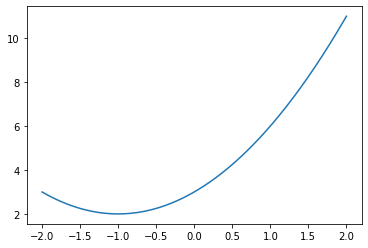

In [30]:
# 求f(x) = a*x^2 + b*x + c的最小值, x 属于 [0, 1]
# 使用optimizer.apply_gradients
a = 1.0
b = 2.0
c = 3.0
print(f"y = ({a} * x^2) + ({b} * x) + ({c})")
x = np.linspace(-2, 2, 10**3)
l_x = list(x)
l_y = []
for i in x:
    y = a*i**2 + b*i + c
    # y = a*i**2 + c
    l_y.append(y)
    pass

plt.plot(l_x, l_y)
plt.show()


In [31]:
# x 会自动往最小值的方向变化
# x初始化为0，会递增至最小值
x = tf.Variable(0.0, name = "x", dtype = tf.float32)
a = tf.constant(1.0)
b = tf.constant(2.0)
c = tf.constant(3.0)

print(f"y = ({a} * x^2) + ({b} * x) + ({c})")
print()

l_x = []
l_y = []
l_d = []

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
for _ in range(1000):
    # print(f"x = {x}")
    l_x.append(x.numpy())
    with tf.GradientTape() as tape:
        y = a * tf.pow(x, 2) + b * x + c
        # print(f"y = {y}")
        l_y.append(y.numpy())

    dy_dx = tape.gradient(y, x)
    l_d.append(dy_dx.numpy())
    # print(f"dy_dx = {dy_dx}")
    optimizer.apply_gradients(grads_and_vars=[(dy_dx, x)])
    # print()

tf.print(f"x = {x}")
print()
tf.print(f"dy_dx = {dy_dx}")
print()
tf.print(f"y = {y}")

y = (1.0 * x^2) + (2.0 * x) + (3.0)

x = <tf.Variable 'x:0' shape=() dtype=float32, numpy=-0.99999857>

dy_dx = 2.86102294921875e-06

y = 2.0


l_x = [-0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99999857, -0.99

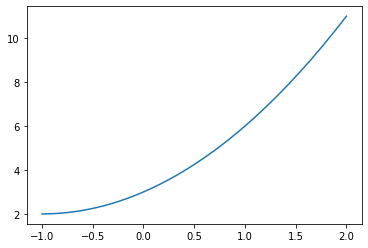

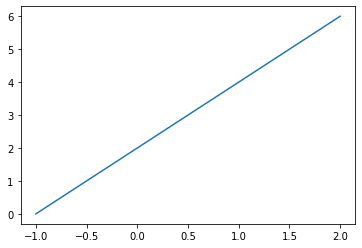

In [34]:
print(f"l_x = {l_x[::-1]}")
print(f"l_d = {l_d[::-1]}")
print(f"l_y = {l_y[::-1]}")

plt.plot(l_x, l_y)
plt.show()
plt.plot(l_x, l_d)
plt.show()


In [38]:
# x 会自动往最小值的方向变化
# x初始化为-2，会 递减 至最小值
x = tf.Variable(-2.0, name = "x", dtype = tf.float32)
a = tf.constant(1.0)
b = tf.constant(2.0)
c = tf.constant(3.0)

print(f"y = ({a} * x^2) + ({b} * x) + ({c})")
print()

l_x = []
l_y = []
l_d = []

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
for _ in range(1000):
    # print(f"x = {x}")
    l_x.append(x.numpy())
    with tf.GradientTape() as tape:
        y = a * tf.pow(x, 2) + b * x + c
        # print(f"y = {y}")
        l_y.append(y.numpy())

    dy_dx = tape.gradient(y, x)
    l_d.append(dy_dx.numpy())
    # print(f"dy_dx = {dy_dx}")
    optimizer.apply_gradients(grads_and_vars=[(dy_dx, x)])
    # print()

tf.print(f"x = {x}")
print()
tf.print(f"dy_dx = {dy_dx}")
print()
tf.print(f"y = {y}")


y = (1.0 * x^2) + (2.0 * x) + (3.0)

x = <tf.Variable 'x:0' shape=() dtype=float32, numpy=-1.0000029>

dy_dx = -5.7220458984375e-06

y = 2.0


l_x = [-1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.0000029, -1.000002

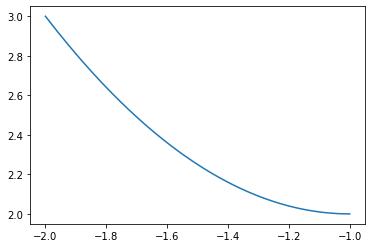

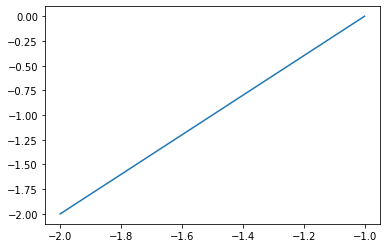

In [39]:
print(f"l_x = {l_x[::-1]}")
print(f"l_d = {l_d[::-1]}")
print(f"l_y = {l_y[::-1]}")

plt.plot(l_x, l_y)
plt.show()
plt.plot(l_x, l_d)
plt.show()

### 方式 - 2

使用optimizer.minimize：相当于先用tape求gradient, 再apply_gradient

In [41]:
# 求f(x) = a*x^2 + b*x + c的最小值

x = tf.Variable(0.0, name = "x", dtype = tf.float32)

#注意f()无参数
def f():
    aa = tf.constant(1.0)
    bb = tf.constant(2.0)
    cc = tf.constant(3.0)
    yy = aa * tf.pow(x, 2) + b * x + c
    return yy

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
for _ in range(1000):
    optimizer.minimize(f, [x])

tf.print(f"x = {x}")
tf.print(f"y = {f()}")

x = <tf.Variable 'x:0' shape=() dtype=float32, numpy=-0.99999857>
y = 2.0


### 方式 - 3

使用autograph

In [ ]:
# 在autograph中完成最小值求解
# 使用optimizer.apply_gradients

x = tf.Variable(0.0, name="x", dtype=tf.float32)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

@tf.function
def minimizef():
    aa = tf.constant(1.0)
    bb = tf.constant(2.0)
    cc = tf.constant(1.0)

    #注意autograph时使用tf.range(1000)而不是range(1000)
    for _ in tf.range(1000):
        with tf.GradientTape() as t:
            yy = aa*tf.pow(x, 2) + bb*x + cc
        dyy_dxx = t.gradient(yy, x)
        optimizer.apply_gradients(grads_and_vars=[(dyy_dxx, x)])

    yy = a * tf.pow(x, 2) + b*x + c
    return yy

tf.print(minimizef())
tf.print(x)
